# Library Usage

For this assignment, you will be taking Library Usage data from San Francisco and creating charts to determine which patron type checks out items from the library the most.

* Import your dependencies and then import your data into a pandas data frame from the CSV within the 'Data' folder
* Reduce the data to include only patrons who have checked out at least one item
* Split up your data into groups based upon the 'Patron Type Definition' column
* Chart your data using a bar graph, giving it both a title and labels for the axes

In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Import our data into pandas from CSV
filepath = "../Resources/library_usage.csv"
df = pd.read_csv(filepath)
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,0,0,20 to 24 years,P1,Park,NaN,NaN,z,email,True,2014,False,5.0
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016.0,z,email,True,2010,False,4.0
2,0,ADULT,0,0,45 to 54 years,P1,Park,NaN,NaN,a,print,False,2016,True,NaN
3,0,ADULT,0,0,25 to 34 years,X,Main Library,NaN,NaN,z,email,True,2015,False,3.0
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016.0,z,email,True,2003,False,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423448 entries, 0 to 423447
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Patron Type Code              423448 non-null  int64  
 1   Patron Type Definition        423448 non-null  object 
 2   Total Checkouts               423448 non-null  int64  
 3   Total Renewals                423448 non-null  int64  
 4   Age Range                     423233 non-null  object 
 5   Home Library Code             423408 non-null  object 
 6   Home Library Definition       423448 non-null  object 
 7   Circulation Active Month      355544 non-null  object 
 8   Circulation Active Year       355544 non-null  float64
 9   Notice Preference Code        423448 non-null  object 
 10  Notice Preference Definition  423448 non-null  object 
 11  Provided Email Address        423448 non-null  bool   
 12  Year Patron Registered        423448 non-nul

In [5]:
423233/423448

0.9994922635128752

In [6]:
# DROP Circulation Month/Year, Supervisor District (fairly null, not needed for analysis)
# dropna() since we have very few null values left.

cols_to_drop = ["Circulation Active Month", "Circulation Active Year", "Supervisor District"]
df2 = df.drop(columns=cols_to_drop)
df2 = df2.dropna(how="any").reset_index(drop=True) # dropping rows

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423193 entries, 0 to 423192
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Patron Type Code              423193 non-null  int64 
 1   Patron Type Definition        423193 non-null  object
 2   Total Checkouts               423193 non-null  int64 
 3   Total Renewals                423193 non-null  int64 
 4   Age Range                     423193 non-null  object
 5   Home Library Code             423193 non-null  object
 6   Home Library Definition       423193 non-null  object
 7   Notice Preference Code        423193 non-null  object
 8   Notice Preference Definition  423193 non-null  object
 9   Provided Email Address        423193 non-null  bool  
 10  Year Patron Registered        423193 non-null  int64 
 11  Outside of County             423193 non-null  bool  
dtypes: bool(2), int64(4), object(6)
memory usage: 33.1+ MB


In [8]:
# Filter data so it only includes patrons who checked out at least one item
mask = df2["Total Checkouts"] > 0
df2 = df2.loc[mask].reset_index(drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349704 entries, 0 to 349703
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Patron Type Code              349704 non-null  int64 
 1   Patron Type Definition        349704 non-null  object
 2   Total Checkouts               349704 non-null  int64 
 3   Total Renewals                349704 non-null  int64 
 4   Age Range                     349704 non-null  object
 5   Home Library Code             349704 non-null  object
 6   Home Library Definition       349704 non-null  object
 7   Notice Preference Code        349704 non-null  object
 8   Notice Preference Definition  349704 non-null  object
 9   Provided Email Address        349704 non-null  bool  
 10  Year Patron Registered        349704 non-null  int64 
 11  Outside of County             349704 non-null  bool  
dtypes: bool(2), int64(4), object(6)
memory usage: 27.3+ MB


In [9]:
df2["Patron Type Definition"].value_counts()

Patron Type Definition
ADULT                  224716
JUVENILE                53921
SENIOR                  34807
YOUNG ADULT             24027
WELCOME                  7706
TEACHER CARD             1553
SPECIAL                   927
STAFF                     834
VISITOR                   369
AT USER ADULT             299
RETIRED STAFF             156
DIGITAL ACCESS CARD       123
BOOKS BY MAIL              83
AT USER SENIOR             55
AT USER JUVENILE           42
AT USER TEEN               33
FRIENDS FOR LIFE           30
AT USER WELCOME            23
Name: count, dtype: int64

In [14]:
# RENAMING values
df2["Patron Type Definition"] = df2["Patron Type Definition"].replace({"AT USER ADULT": "ADULT",
                                     "AT USER SENIOR": "SENIOR",
                                     "AT USER JUVENILE": "JUVENILE",
                                     "AT USER TEEN": "YOUNG ADULT",
                                     "AT USER WELCOME": "WELCOME"})

df2["Patron Type Definition"].value_counts()

Patron Type Definition
ADULT                  225015
JUVENILE                53963
SENIOR                  34862
YOUNG ADULT             24060
WELCOME                  7729
TEACHER CARD             1553
SPECIAL                   927
STAFF                     834
VISITOR                   369
RETIRED STAFF             156
DIGITAL ACCESS CARD       123
BOOKS BY MAIL              83
FRIENDS FOR LIFE           30
Name: count, dtype: int64

In [15]:
# RENAMING values
df2["Patron Type Definition"] = df2["Patron Type Definition"].replace({"RETIRED STAFF": "STAFF",
                                     "VISITOR": "OTHER",
                                     "DIGITAL ACCESS CARD": "OTHER",
                                     "BOOKS BY MAIL": "OTHER",
                                     "FRIENDS FOR LIFE": "OTHER"})

df2["Patron Type Definition"].value_counts()

Patron Type Definition
ADULT           225015
JUVENILE         53963
SENIOR           34862
YOUNG ADULT      24060
WELCOME           7729
TEACHER CARD      1553
STAFF              990
SPECIAL            927
OTHER              605
Name: count, dtype: int64

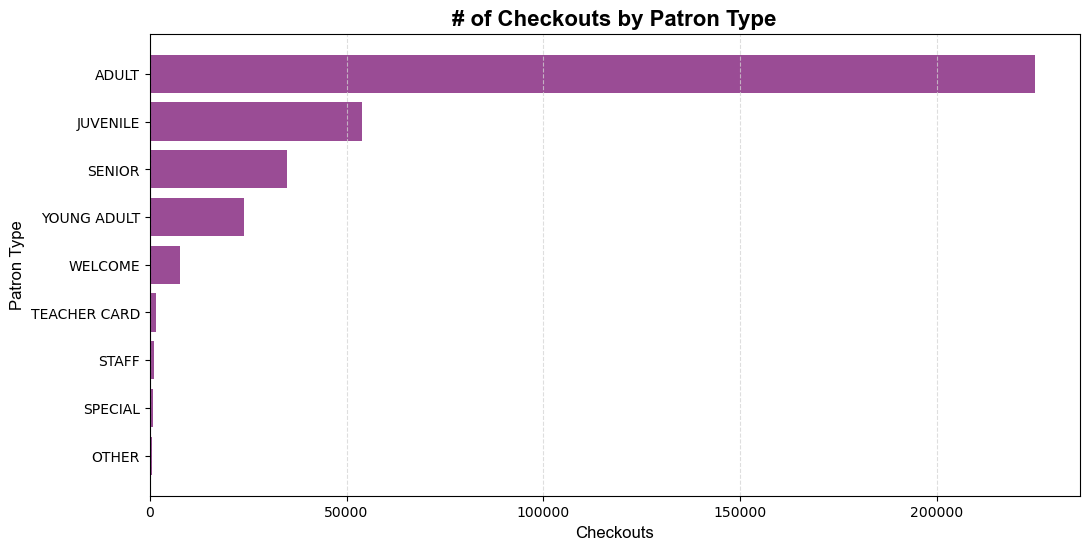

In [17]:
# Data Viz Recipe
data = df2["Patron Type Definition"].value_counts().sort_values()

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.barh(data.index, data.values, color="#9A4C95", align="center")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Checkouts", fontfamily="Arial", fontsize=12)
plt.ylabel("Patron Type", fontfamily="Arial", fontsize=12)
plt.title("# of Checkouts by Patron Type", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
# plt.ylim(0, 350)

# Add in a background grid
plt.grid(axis="x", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

In [18]:
df2["Home Library Definition"].value_counts()

Home Library Definition
Main Library                          91298
Mission                               21818
Richmond                              19885
Chinatown                             15503
Excelsior                             14749
Sunset                                13338
Ortega                                13203
West Portal                           12189
Ingleside                              9278
Merced                                 8945
Marina                                 8864
Glen Park                              8725
Mission Bay                            8710
Parkside                               8592
Bernal Heights                         8487
Western Addition                       8149
Portola                                7720
North Beach                            7511
Eureka Valley/Harvey Milk Memorial     7462
Noe Valley/Sally Brunn                 7460
Presidio                               7180
Park                                   7125
Bayview/

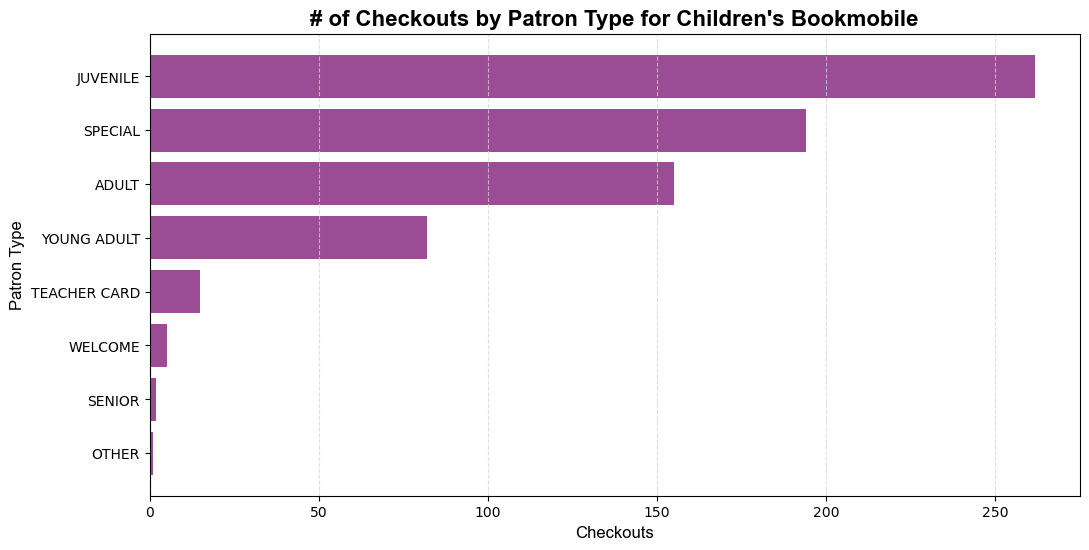

In [22]:
# filter rows to a specific library
library = "Children's Bookmobile"

mask = df2["Home Library Definition"] == library
df3 = df2.loc[mask].reset_index(drop=True) # since we are dropping rows

# Data Viz Recipe
data = df3["Patron Type Definition"].value_counts().sort_values()

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.barh(data.index, data.values, color="#9A4C95", align="center")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Checkouts", fontfamily="Arial", fontsize=12)
plt.ylabel("Patron Type", fontfamily="Arial", fontsize=12)
plt.title(f"# of Checkouts by Patron Type for {library}", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
# plt.ylim(0, 350)

# Add in a background grid
plt.grid(axis="x", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

In [27]:
# function
def make_pie(library, df2):
    # apply filter
    mask = df2["Home Library Definition"] == library
    df3 = df2.loc[mask].reset_index(drop=True) # since we are dropping rows
    
    # Data Viz Recipe
    data = df3["Patron Type Definition"].value_counts().sort_values()
    
    # Change Canvas Size
    plt.figure(figsize=(6, 6))
    
    # Create a bor this assignment, you will be taking Library Usage data from San Francisco and creating charts to determine which patron type checks out items from the library the most.

Import your dependencies and then import your data into a pandas data frame from the CSV within the 'Data' folder
Reduce the data to include only patrons who have checked out at least one item
Split up your data into groups based upon the 'Patron Type Definition' column
Chart your data using a bar graph, giving it both a title and labels for the axes

asic plot
    plt.pie(data.values, labels=data.index, autopct="%1.1f%%", shadow=False, startangle=180, pctdistance=0.85)
    
    # Customizations
    # DONUT
    centre_circle = plt.Circle((0,0), 0.70, fc='white')  # Adjust 0.70 for hole size
    plt.gca().add_artist(centre_circle)
    
    # Change colors
    # Add in reference lines
    # Add Labels/Title
    plt.title(f"% of Checkouts by Patron Type for {library}", fontweight="bold", fontsize=16, fontfamily="Arial")
    
    # Set X/Y Limits
    plt.axis("equal")
    
    # Show/Save the Graph
    plt.show()

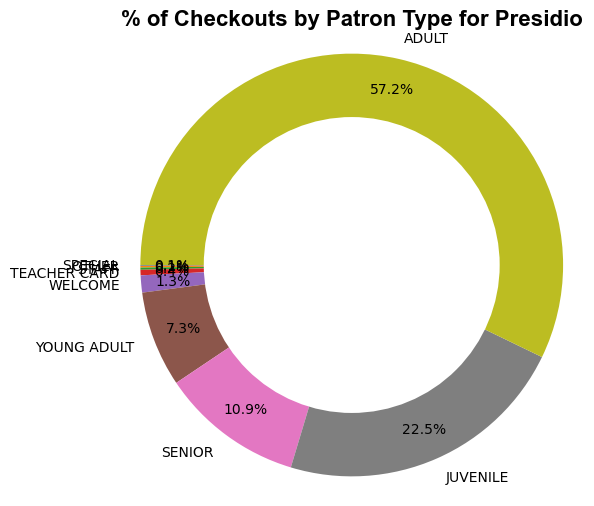

In [28]:
# filter rows to a specific library
library = "Presidio"

make_pie(library, df2)

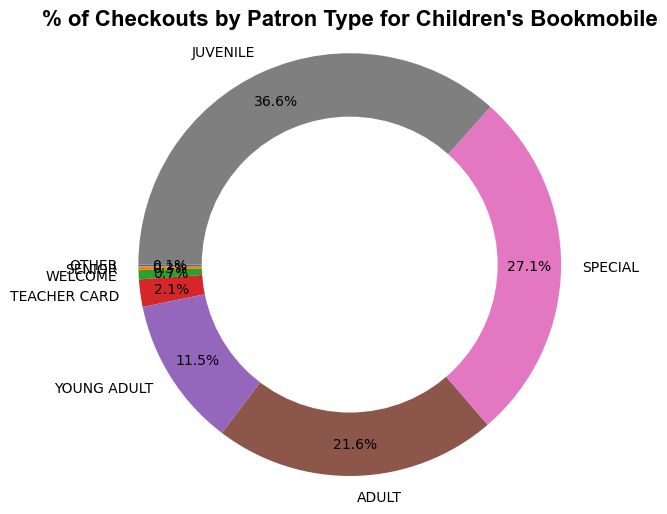

In [30]:
# filter rows to a specific library
library = "Children's Bookmobile"

make_pie(library, df2)

In [26]:
# USE the donut chart to compare libraries

In [ ]:
# Filter data so it only includes patrons who checked out at least one item


# Split up our data into groups based upon 'Patron Type Definition'


# Find out how many of each patron type borrowed library items


# Chart our data, give it a title, and label the axes


# Bonus!

You will now take the same base data frame before and create some code that will allow you to create individual pie charts for each library branch. For this part of the activity, we want you to chart the total 'Total Checkouts' of each library, sorted by patron type. If you are able to, try and come up with a method to do this without using loc or iloc to filter the original data frame! You can use loc to filter group data though.

Since there are quite a lot of patron types with minimal checkouts, the pie charts could look messy with overlapping text. You may also like to include a filter to limit the minimum number of total checkouts by patron group.

In [ ]:
# Split up our data into groups based upon 'Home Library Definition' and 'Patron Type Definition'


# Create a new variable that holds the sum of our groups


In [ ]:
# Make a variable called branch and store a 'Home Library Definition' in it


# Make a variable called min_checkouts that you can change depending on how busy the library branch you've chosen is


# Collect the loans of the branch above


# filter the data to patron types with greater than the value set for min_checkouts


# Create a pie chart based upon the total checkouts (or loans) of that single branch
